## Derbi Analysis 

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def upload_data(df, file_path):
    df.to_csv(file_path, index=False)

In [3]:
def show_image(image_path):
    img_path = image_path
    
    img1 = mpimg.imread(img_path)
    fig, ax = plt.subplots(figsize=(10, 9))
    ax.imshow(img1)
    ax.axis("off")  
    plt.show()  

In [4]:
derbi_data = pd.read_csv(r'text data barca real fbreq/derbit_data.txt', delimiter='\t', header=None, names=['Col1', 'Col2', 'Col3'])

## EDA Process

In [5]:
derbi_data

Col1  \
Comp         Round       Day Date       Time          Home            xG  Score xG  Away            Attendance Venue                                    Referee   
La Liga      La Liga     Sun 2025-02-09 NaN           Real Madrid     NaN NaN   NaN Atlético Madrid NaN        Estadio Santiago Bernabéu                    NaN   
                             2024-09-29 NaN           Atlético Madrid NaN NaN   NaN Real Madrid     NaN        Estadio Cívitas Metropolitano                NaN   
                             2024-02-04 21:00 (22:00) Real Madrid     1.9 1–1   1.1 Atlético Madrid 76,732     Estadio Santiago Bernabéu           José Sánchez   
Copa del Rey Round of 16 Thu 2024-01-18 21:30 (22:30) Atlético Madrid NaN 4–2   NaN Real Madrid     67,623     Estadio Cívitas Metropolitano   Guillermo Cuadra   
...                                                                                                                                                         ...   
La Liga      La Liga     Sat 1991-01-12 NaN           Real Madrid     NaN 0–3   NaN Atlético Madrid NaN        Santiago Bernabéu              Enríquez Negreira   
                             1990-04-28 NaN           Atlético Madrid NaN 3–3   NaN Real Madrid     NaN        Vicente Calderón                  Mazorra Freire   
                             1990-01-06 NaN           Real Madrid     NaN 3–1   NaN Atlético Madrid NaN        Santiago Bernabéu              Enríquez Negreira   
                             1989-05-20 NaN           Atlético Madrid NaN 3–3   NaN Real Madrid     NaN        Vicente Calderón                 Merino González   
                             1988-12-03 NaN           Real Madrid     NaN 2–1   NaN Atlético Madrid NaN        Santiago Bernabéu               Martín Navarrete   

                                                                                                                                                      Col2  \
Comp         Round       Day Date       Time          Home            xG  Score xG  Away            Attendance Venue                          Match Report   
La Liga      La Liga     Sun 2025-02-09 NaN           Real Madrid     NaN NaN   NaN Atlético Madrid NaN        Estadio Santiago Bernabéu               NaN   
                             2024-09-29 NaN           Atlético Madrid NaN NaN   NaN Real Madrid     NaN        Estadio Cívitas Metropolitano           NaN   
                             2024-02-04 21:00 (22:00) Real Madrid     1.9 1–1   1.1 Atlético Madrid 76,732     Estadio Santiago Bernabéu      Match Report   
Copa del Rey Round of 16 Thu 2024-01-18 21:30 (22:30) Atlético Madrid NaN 4–2   NaN Real Madrid     67,623     Estadio Cívitas Metropolitano  Match Report   
...                                                                                                                                                    ...   
La Liga      La Liga     Sat 1991-01-12 NaN           Real Madrid     NaN 0–3   NaN Atlético Madrid NaN        Santiago Bernabéu              Match Report   
                             1990-04-28 NaN           Atlético Madrid NaN 3–3   NaN Real Madrid     NaN        Vicente Calderón               Match Report   
                             1990-01-06 NaN           Real Madrid     NaN 3–1   NaN Atlético Madrid NaN        Santiago Bernabéu              Match Report   
                             1989-05-20 NaN           Atlético Madrid NaN 3–3   NaN Real Madrid     NaN        Vicente Calderón               Match Report   
                             1988-12-03 NaN           Real Madrid     NaN 2–1   NaN Atlético Madrid NaN        Santiago Bernabéu              Match Report   

                                                                                                                                                             Col3  
Comp         Round       Day Date       Time          Home            xG  Score xG  Away            Attendance Venue                     

In [6]:
derbi_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 87 entries, ('Comp', 'Round', 'Day', 'Date', 'Time', 'Home', 'xG', 'Score', 'xG', 'Away', 'Attendance', 'Venue') to ('La Liga', 'La Liga', 'Sat', '1988-12-03', nan, 'Real Madrid', nan, '2–1', nan, 'Atlético Madrid', nan, 'Santiago Bernabéu')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Col1    85 non-null     object
 1   Col2    85 non-null     object
 2   Col3    17 non-null     object
dtypes: object(3)
memory usage: 11.6+ KB


In [7]:
derbi_data_reset = derbi_data.reset_index()

derbi_data_reset.columns = ['Comp', 'Round', 'Day', 'Date', 'Time', 'Home', 'xG_Home', 'Score', 'xG_Away', 'Away', 'Attendance', 'Venue', 'Col1', 'Col2', 'Col3']

derbi_data_clean = derbi_data_reset[['Comp', 'Round', 'Day', 'Date', 'Time', 'Home', 'xG_Home', 'Score', 'xG_Away', 'Away', 'Attendance', 'Venue']]

### Dataset After Index Resetting 

In [8]:
derbi_data_clean

,Comp,Round,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue
0,Comp,Round,Day,Date,Time,Home,xG,Score,xG,Away,Attendance,Venue
1,La Liga,La Liga,Sun,2025-02-09,NaN,Real Madrid,NaN,NaN,NaN,Atlético Madrid,NaN,Estadio Santiago Bernabéu
2,La Liga,La Liga,Sun,2024-09-29,NaN,Atlético Madrid,NaN,NaN,NaN,Real Madrid,NaN,Estadio Cívitas Metropolitano
3,La Liga,La Liga,Sun,2024-02-04,21:00 (22:00),Real Madrid,1.9,1–1,1.1,Atlético Madrid,"76,732",Estadio Santiago Bernabéu
4,Copa del Rey,Round of 16,Thu,2024-01-18,21:30 (22:30),Atlético Madrid,NaN,4–2,NaN,Real Madrid,"67,623",Estadio Cívitas Metropolitano
...,...,...,...,...,...,...,...,...,...,...,...,...
82,La Liga,La Liga,Sat,1991-01-12,NaN,Real Madrid,NaN,0–3,NaN,Atlético Madrid,NaN,Santiago Bernabéu
83,La Liga,La Liga,Sat,1990-04-28,NaN,Atlético Madrid,NaN,3–3,NaN,Real Madrid,NaN,Vicente Calderón
84,La Liga,La Liga,Sat,1990-01-06,NaN,Real Madrid,NaN,3–1,NaN,Atlético Madrid,NaN,Santiago Bernabéu
85,La Liga,La Liga,Sat,1989-05-20,NaN,Atlético Madrid,NaN,3–3,NaN,Real Madrid,NaN,Vicente Calderón


### Removing Data After 2024

In [9]:
derbi_data = derbi_data_clean.loc[3:,:]

In [10]:
derbi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 3 to 86
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Comp        84 non-null     object
 1   Round       84 non-null     object
 2   Day         84 non-null     object
 3   Date        84 non-null     object
 4   Time        35 non-null     object
 5   Home        84 non-null     object
 6   xG_Home     17 non-null     object
 7   Score       84 non-null     object
 8   xG_Away     17 non-null     object
 9   Away        84 non-null     object
 10  Attendance  33 non-null     object
 11  Venue       84 non-null     object
dtypes: object(12)
memory usage: 8.0+ KB


## Feature Extraction "Extracting Year From Date"

In [11]:
derbi_data = derbi_data.copy()

In [12]:
def convert_to_datetime(date_str):
    try:
        return datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return None


derbi_data.loc[:, 'Date'] = derbi_data['Date'].apply(convert_to_datetime)
derbi_data.loc[:, 'Year'] = derbi_data['Date'].apply(lambda x: x.year if x is not None else None)

print(derbi_data[['Date', 'Year']])

                   Date    Year
3   2024-02-04 00:00:00  2024.0
4   2024-01-18 00:00:00  2024.0
5   2024-01-10 00:00:00  2024.0
6   2023-09-24 00:00:00  2023.0
7   2023-02-25 00:00:00  2023.0
..                  ...     ...
82  1991-01-12 00:00:00  1991.0
83  1990-04-28 00:00:00  1990.0
84  1990-01-06 00:00:00  1990.0
85  1989-05-20 00:00:00  1989.0
86  1988-12-03 00:00:00  1988.0

[84 rows x 2 columns]


In [13]:
derbi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 3 to 86
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Comp        84 non-null     object 
 1   Round       84 non-null     object 
 2   Day         84 non-null     object 
 3   Date        81 non-null     object 
 4   Time        35 non-null     object 
 5   Home        84 non-null     object 
 6   xG_Home     17 non-null     object 
 7   Score       84 non-null     object 
 8   xG_Away     17 non-null     object 
 9   Away        84 non-null     object 
 10  Attendance  33 non-null     object 
 11  Venue       84 non-null     object 
 12  Year        81 non-null     float64
dtypes: float64(1), object(12)
memory usage: 8.7+ KB


### Converting Year format from float into int

In [14]:
derbi_data['Year'] = derbi_data['Year'].astype('Int64')

In [15]:
derbi_data.head()

,Comp,Round,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue,Year
3,La Liga,La Liga,Sun,2024-02-04 00:00:00,21:00 (22:00),Real Madrid,1.9,1–1,1.1,Atlético Madrid,"76,732",Estadio Santiago Bernabéu,2024
4,Copa del Rey,Round of 16,Thu,2024-01-18 00:00:00,21:30 (22:30),Atlético Madrid,NaN,4–2,NaN,Real Madrid,"67,623",Estadio Cívitas Metropolitano,2024
5,Supercopa de España,Semi-finals,Wed,2024-01-10 00:00:00,22:00 (21:00),Real Madrid,NaN,5–3,NaN,Atlético Madrid,"25,000",Al Awwal Park Stadium,2024
6,La Liga,La Liga,Sun,2023-09-24 00:00:00,21:00 (22:00),Atlético Madrid,1.4,3–1,1.0,Real Madrid,"69,082",Estadio Cívitas Metropolitano,2023
7,La Liga,La Liga,Sat,2023-02-25 00:00:00,18:30 (19:30),Real Madrid,1.6,1–1,0.3,Atlético Madrid,"64,721",Estadio Santiago Bernabéu,2023


### Feature Extraction "Extracting score_1 and score_2 From Score Feature Apply Computional Operantions"

### Converting 'Score' to string to handle any potential non-string values

In [16]:
delimiter = '–'
derbi_data['Score'] = derbi_data['Score'].astype(str)

### Split 'Score' into 'score_1' and 'score_2'

In [17]:
derbi_data[['score_1', 'score_2']] = derbi_data['Score'].str.split(delimiter, expand=True)

### Convert 'score_1' and 'score_2' to numeric values

In [18]:
derbi_data['score_1'] = pd.to_numeric(derbi_data['score_1'], errors='coerce')
derbi_data['score_2'] = pd.to_numeric(derbi_data['score_2'], errors='coerce')

In [19]:
derbi_data.head()

,Comp,Round,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue,Year,score_1,score_2
3,La Liga,La Liga,Sun,2024-02-04 00:00:00,21:00 (22:00),Real Madrid,1.9,1–1,1.1,Atlético Madrid,"76,732",Estadio Santiago Bernabéu,2024,1.0,1.0
4,Copa del Rey,Round of 16,Thu,2024-01-18 00:00:00,21:30 (22:30),Atlético Madrid,NaN,4–2,NaN,Real Madrid,"67,623",Estadio Cívitas Metropolitano,2024,4.0,2.0
5,Supercopa de España,Semi-finals,Wed,2024-01-10 00:00:00,22:00 (21:00),Real Madrid,NaN,5–3,NaN,Atlético Madrid,"25,000",Al Awwal Park Stadium,2024,5.0,3.0
6,La Liga,La Liga,Sun,2023-09-24 00:00:00,21:00 (22:00),Atlético Madrid,1.4,3–1,1.0,Real Madrid,"69,082",Estadio Cívitas Metropolitano,2023,3.0,1.0
7,La Liga,La Liga,Sat,2023-02-25 00:00:00,18:30 (19:30),Real Madrid,1.6,1–1,0.3,Atlético Madrid,"64,721",Estadio Santiago Bernabéu,2023,1.0,1.0


### Type Conversation For score_1 and score_2

In [20]:
derbi_data['score_1'] = derbi_data['score_1'].astype('Int64')
derbi_data['score_2'] = derbi_data['score_2'].astype('Int64')

## Selecting The Needed Feature For The Report

In [21]:
derbi_data = derbi_data[['Year','Comp', 'Round','Home','score_1','score_2','Away','Score', 'Attendance','Venue']]

In [22]:
derbi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 3 to 86
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        81 non-null     Int64 
 1   Comp        84 non-null     object
 2   Round       84 non-null     object
 3   Home        84 non-null     object
 4   score_1     79 non-null     Int64 
 5   score_2     79 non-null     Int64 
 6   Away        84 non-null     object
 7   Score       84 non-null     object
 8   Attendance  33 non-null     object
 9   Venue       84 non-null     object
dtypes: Int64(3), object(7)
memory usage: 6.9+ KB


### Checking If there are null values in the score_1 and score_2

In [23]:
print(derbi_data['score_1'].isnull().sum())
print(derbi_data['score_2'].isnull().sum())

5
5


## Selecting Derbi Statistics with Deigo Simone

In [24]:
derbi_with_simone = derbi_data[(derbi_data['Year'] >= 2011) & (derbi_data['Year'] <= 2024)].iloc[:-1,:]
derbi_with_simone

,Year,Comp,Round,Home,score_1,score_2,Away,Score,Attendance,Venue
3,2024,La Liga,La Liga,Real Madrid,1,1,Atlético Madrid,1–1,"76,732",Estadio Santiago Bernabéu
4,2024,Copa del Rey,Round of 16,Atlético Madrid,4,2,Real Madrid,4–2,"67,623",Estadio Cívitas Metropolitano
5,2024,Supercopa de España,Semi-finals,Real Madrid,5,3,Atlético Madrid,5–3,"25,000",Al Awwal Park Stadium
6,2023,La Liga,La Liga,Atlético Madrid,3,1,Real Madrid,3–1,"69,082",Estadio Cívitas Metropolitano
7,2023,La Liga,La Liga,Real Madrid,1,1,Atlético Madrid,1–1,"64,721",Estadio Santiago Bernabéu
8,2023,Copa del Rey,Quarter-finals,Real Madrid,3,1,Atlético Madrid,3–1,"68,000",Estadio Santiago Bernabéu
9,2022,La Liga,La Liga,Atlético Madrid,1,2,Real Madrid,1–2,"66,881",Estadio Cívitas Metropolitano
10,2022,La Liga,La Liga,Atlético Madrid,1,0,Real Madrid,1–0,"63,874",Estadio Wanda Metropolitano
11,2021,La Liga,La Liga,Real Madrid,2,0,Atlético Madrid,2–0,"51,024",Estadio Santiago Bernabéu
12,2021,La Liga,La Liga,Atlético Madrid,1,1,Real Madrid,1–1,NaN,Estadio Wanda Metropolitano


## Handle Missing Data IN score_1 & score_2 in Derbi Statistics with Deigo Simone

In [25]:
derbi_with_simone.loc[26, 'score_1'] = 1
derbi_with_simone.loc[26, 'score_2'] = 1
derbi_with_simone.loc[15, 'score_1'] = 0
derbi_with_simone.loc[15, 'score_2'] = 0

In [26]:
derbi_with_simone

,Year,Comp,Round,Home,score_1,score_2,Away,Score,Attendance,Venue
3,2024,La Liga,La Liga,Real Madrid,1,1,Atlético Madrid,1–1,"76,732",Estadio Santiago Bernabéu
4,2024,Copa del Rey,Round of 16,Atlético Madrid,4,2,Real Madrid,4–2,"67,623",Estadio Cívitas Metropolitano
5,2024,Supercopa de España,Semi-finals,Real Madrid,5,3,Atlético Madrid,5–3,"25,000",Al Awwal Park Stadium
6,2023,La Liga,La Liga,Atlético Madrid,3,1,Real Madrid,3–1,"69,082",Estadio Cívitas Metropolitano
7,2023,La Liga,La Liga,Real Madrid,1,1,Atlético Madrid,1–1,"64,721",Estadio Santiago Bernabéu
8,2023,Copa del Rey,Quarter-finals,Real Madrid,3,1,Atlético Madrid,3–1,"68,000",Estadio Santiago Bernabéu
9,2022,La Liga,La Liga,Atlético Madrid,1,2,Real Madrid,1–2,"66,881",Estadio Cívitas Metropolitano
10,2022,La Liga,La Liga,Atlético Madrid,1,0,Real Madrid,1–0,"63,874",Estadio Wanda Metropolitano
11,2021,La Liga,La Liga,Real Madrid,2,0,Atlético Madrid,2–0,"51,024",Estadio Santiago Bernabéu
12,2021,La Liga,La Liga,Atlético Madrid,1,1,Real Madrid,1–1,NaN,Estadio Wanda Metropolitano


## Data Restructuring To Apply Analysis 

In [27]:
real_goals = []
for i in range (0, derbi_with_simone.shape[0], 1) :
    if derbi_with_simone['Home'].iloc[i] == 'Real Madrid':
       real_goals.append(derbi_with_simone['score_1'].iloc[i])
        
    elif derbi_with_simone['Away'].iloc[i] == 'Real Madrid':
       real_goals.append(derbi_with_simone['score_2'].iloc[i])

In [28]:
atleti_goals = []
for i in range (0, derbi_with_simone.shape[0], 1) :
    if derbi_with_simone['Home'].iloc[i] == 'Atlético Madrid':
       atleti_goals.append(derbi_with_simone['score_1'].iloc[i])

    elif derbi_with_simone['Away'].iloc[i] == 'Atlético Madrid':
       atleti_goals.append(derbi_with_simone['score_2'].iloc[i])

In [29]:
simone_in_derbi_dict = { 'Year' : list(derbi_with_simone['Year']),
                         'Comp' : list(derbi_with_simone['Comp']),
                         'Round': list(derbi_with_simone['Round']),
                         'Real Madrid Goals': real_goals,
                         'Atletico Madrid Goals': atleti_goals,
                         'Attendance':list(derbi_with_simone['Attendance']),
                         'Venue':list(derbi_with_simone['Venue']) }

In [30]:
simone_in_derbi_df = pd.DataFrame(simone_in_derbi_dict)

In [31]:
simone_in_derbi_df

,Year,Comp,Round,Real Madrid Goals,Atletico Madrid Goals,Attendance,Venue
0,2024,La Liga,La Liga,1,1,"76,732",Estadio Santiago Bernabéu
1,2024,Copa del Rey,Round of 16,2,4,"67,623",Estadio Cívitas Metropolitano
2,2024,Supercopa de España,Semi-finals,5,3,"25,000",Al Awwal Park Stadium
3,2023,La Liga,La Liga,1,3,"69,082",Estadio Cívitas Metropolitano
4,2023,La Liga,La Liga,1,1,"64,721",Estadio Santiago Bernabéu
5,2023,Copa del Rey,Quarter-finals,3,1,"68,000",Estadio Santiago Bernabéu
6,2022,La Liga,La Liga,2,1,"66,881",Estadio Cívitas Metropolitano
7,2022,La Liga,La Liga,0,1,"63,874",Estadio Wanda Metropolitano
8,2021,La Liga,La Liga,2,0,"51,024",Estadio Santiago Bernabéu
9,2021,La Liga,La Liga,1,1,NaN,Estadio Wanda Metropolitano


## Adding New Feature "Winner Team" 

In [32]:
winner_team = []
for i in range (0, simone_in_derbi_df.shape[0],1):
    if simone_in_derbi_df['Real Madrid Goals'][i] > simone_in_derbi_df['Atletico Madrid Goals'][i] :
        winner_team.append('Real Madrid')
    elif simone_in_derbi_df['Real Madrid Goals'][i] < simone_in_derbi_df['Atletico Madrid Goals'][i] :
        winner_team.append('Atletico Madrid')
    else:
        winner_team.append('Draw')
simone_in_derbi_df['Winner'] =  pd.Series(winner_team)    

In [33]:
simone_in_derbi_df

,Year,Comp,Round,Real Madrid Goals,Atletico Madrid Goals,Attendance,Venue,Winner
0,2024,La Liga,La Liga,1,1,"76,732",Estadio Santiago Bernabéu,Draw
1,2024,Copa del Rey,Round of 16,2,4,"67,623",Estadio Cívitas Metropolitano,Atletico Madrid
2,2024,Supercopa de España,Semi-finals,5,3,"25,000",Al Awwal Park Stadium,Real Madrid
3,2023,La Liga,La Liga,1,3,"69,082",Estadio Cívitas Metropolitano,Atletico Madrid
4,2023,La Liga,La Liga,1,1,"64,721",Estadio Santiago Bernabéu,Draw
5,2023,Copa del Rey,Quarter-finals,3,1,"68,000",Estadio Santiago Bernabéu,Real Madrid
6,2022,La Liga,La Liga,2,1,"66,881",Estadio Cívitas Metropolitano,Real Madrid
7,2022,La Liga,La Liga,0,1,"63,874",Estadio Wanda Metropolitano,Atletico Madrid
8,2021,La Liga,La Liga,2,0,"51,024",Estadio Santiago Bernabéu,Real Madrid
9,2021,La Liga,La Liga,1,1,NaN,Estadio Wanda Metropolitano,Draw


In [34]:
comp = simone_in_derbi_df.groupby('Comp')

## Derbi in laliga Analysis 

In [35]:
comp_laliga = comp.get_group('La Liga')

In [36]:
comp_laliga

,Year,Comp,Round,Real Madrid Goals,Atletico Madrid Goals,Attendance,Venue,Winner
0,2024,La Liga,La Liga,1,1,"76,732",Estadio Santiago Bernabéu,Draw
3,2023,La Liga,La Liga,1,3,"69,082",Estadio Cívitas Metropolitano,Atletico Madrid
4,2023,La Liga,La Liga,1,1,"64,721",Estadio Santiago Bernabéu,Draw
6,2022,La Liga,La Liga,2,1,"66,881",Estadio Cívitas Metropolitano,Real Madrid
7,2022,La Liga,La Liga,0,1,"63,874",Estadio Wanda Metropolitano,Atletico Madrid
8,2021,La Liga,La Liga,2,0,"51,024",Estadio Santiago Bernabéu,Real Madrid
9,2021,La Liga,La Liga,1,1,NaN,Estadio Wanda Metropolitano,Draw
10,2020,La Liga,La Liga,2,0,NaN,Estadio Alfredo Di Stéfano,Real Madrid
11,2020,La Liga,La Liga,1,0,"77,223",Estadio Santiago Bernabéu,Real Madrid
13,2019,La Liga,La Liga,0,0,"68,032",Estadio Wanda Metropolitano,Draw


In [37]:
comp_laliga.shape

(26, 8)

## Atletico Madrid Vs Real Madrid in LaLiga 

In [38]:
comp_laliga['Winner'].value_counts()

Winner
Draw               10
Real Madrid        10
Atletico Madrid     6
Name: count, dtype: int64

## Atelet vs Real Total Games

In [39]:
total_palyed_matches_in_laliga = np.sum(comp_laliga['Winner'].value_counts().values)
total_palyed_matches_in_laliga

26

#### Total Atleti Goals vs Real in Laliga 

In [40]:
total_atleti_goals = np.sum(comp_laliga['Atletico Madrid Goals'])

In [41]:
total_atleti_goals

25

#### Total Real Goals vs Atleti in Laliga 

In [42]:
total_real_goals = np.sum(comp_laliga['Real Madrid Goals'])

In [43]:
total_real_goals

35

## Checking If There Data Inconsistency 

In [44]:
comp_laliga['Venue'].unique()

array(['Estadio Santiago Bernabéu', 'Estadio Cívitas Metropolitano',
       'Estadio Wanda Metropolitano', 'Estadio Alfredo Di Stéfano',
       'Estadio Vicente Calderón', 'Vicente Calderón',
       'Santiago Bernabéu'], dtype=object)

## Handling Data Inconsistency

In [45]:
# Metropolitano
comp_laliga.loc[:, 'Venue'] = comp_laliga['Venue'].replace(
    ['Estadio Cívitas Metropolitano', 'Estadio Wanda Metropolitano'], 
    'Metropolitano')

comp_laliga.loc[:, 'Venue'] = comp_laliga['Venue'].replace(
    ['Estadio Vicente Calderón', 'Vicente Calderón'], 
    'Vicente Calderón')

comp_laliga.loc[:, 'Venue'] = comp_laliga['Venue'].replace(
    ['Estadio Santiago Bernabéu', 'Santiago Bernabéu'], 
    'Santiago Bernabéu')


In [46]:
comp_laliga['Venue'].unique()

array(['Santiago Bernabéu', 'Metropolitano', 'Estadio Alfredo Di Stéfano',
       'Vicente Calderón'], dtype=object)

In [47]:
comp_laliga.head()

,Year,Comp,Round,Real Madrid Goals,Atletico Madrid Goals,Attendance,Venue,Winner
0,2024,La Liga,La Liga,1,1,"76,732",Santiago Bernabéu,Draw
3,2023,La Liga,La Liga,1,3,"69,082",Metropolitano,Atletico Madrid
4,2023,La Liga,La Liga,1,1,"64,721",Santiago Bernabéu,Draw
6,2022,La Liga,La Liga,2,1,"66,881",Metropolitano,Real Madrid
7,2022,La Liga,La Liga,0,1,"63,874",Metropolitano,Atletico Madrid


## Metropolitano

In [48]:
Metropolitano = comp_laliga[comp_laliga['Venue'] == 'Metropolitano'] 

In [49]:
Metropolitano

,Year,Comp,Round,Real Madrid Goals,Atletico Madrid Goals,Attendance,Venue,Winner
3,2023,La Liga,La Liga,1,3,"69,082",Metropolitano,Atletico Madrid
6,2022,La Liga,La Liga,2,1,"66,881",Metropolitano,Real Madrid
7,2022,La Liga,La Liga,0,1,"63,874",Metropolitano,Atletico Madrid
9,2021,La Liga,La Liga,1,1,NaN,Metropolitano,Draw
13,2019,La Liga,La Liga,0,0,"68,032",Metropolitano,Draw
14,2019,La Liga,La Liga,3,1,"67,752",Metropolitano,Real Madrid
18,2017,La Liga,La Liga,0,0,"66,496",Metropolitano,Draw


#### Total Matches In Metropolitano In Laliga

In [50]:
total_palyed_matches_in_Metropolitano = np.sum(Metropolitano['Winner'].value_counts().values)
total_palyed_matches_in_Metropolitano

7

#### Total Atleti Goals In Metropolitano In Laliga

In [51]:
total_atleti_goals_in_Metropolitano = np.sum(Metropolitano['Atletico Madrid Goals'])
total_atleti_goals_in_Metropolitano

7

##### Total Real Goals In Metropolitano In Laliga

In [52]:
total_Real_goals_in_Metropolitano = np.sum(Metropolitano['Real Madrid Goals'])
total_Real_goals_in_Metropolitano

7

##### WIN LOSE DRAW IN In Metropolitano In Laliga

In [53]:
Metropolitano['Winner'].value_counts()

Winner
Draw               3
Atletico Madrid    2
Real Madrid        2
Name: count, dtype: int64

## Vicente Calderón

In [54]:
Vicente_Calderón = comp_laliga[comp_laliga['Venue'] == 'Vicente Calderón'] 

In [55]:
Vicente_Calderón

,Year,Comp,Round,Real Madrid Goals,Atletico Madrid Goals,Attendance,Venue,Winner
22,2016,La Liga,La Liga,3,0,"53,741",Vicente Calderón,Real Madrid
25,2015,La Liga,La Liga,1,1,"53,079",Vicente Calderón,Draw
28,2015,La Liga,La Liga,0,4,"52,063",Vicente Calderón,Atletico Madrid
33,2014,La Liga,La Liga,2,2,NaN,Vicente Calderón,Draw
35,2013,La Liga,La Liga,2,1,NaN,Vicente Calderón,Real Madrid
37,2012,La Liga,La Liga,4,1,NaN,Vicente Calderón,Real Madrid


In [56]:
total_palyed_matches_in_Vicente_Calderón = np.sum(Vicente_Calderón['Winner'].value_counts().values)
total_palyed_matches_in_Vicente_Calderón

6

In [57]:
total_atleti_goals_in_Vicente_Calderón = np.sum(Vicente_Calderón['Atletico Madrid Goals'])
total_atleti_goals_in_Vicente_Calderón

9

In [58]:
total_Real_goals_in_Vicente_Calderón = np.sum(Vicente_Calderón['Real Madrid Goals'])
total_Real_goals_in_Vicente_Calderón

12

In [59]:
Vicente_Calderón['Winner'].value_counts()

Winner
Real Madrid        3
Draw               2
Atletico Madrid    1
Name: count, dtype: int64

## Santiago Bernabéu

In [60]:
Santiago_Bernabéu = comp_laliga[comp_laliga['Venue'] == 'Santiago Bernabéu'] 

In [61]:
Santiago_Bernabéu

,Year,Comp,Round,Real Madrid Goals,Atletico Madrid Goals,Attendance,Venue,Winner
0,2024,La Liga,La Liga,1,1,"76,732",Santiago Bernabéu,Draw
4,2023,La Liga,La Liga,1,1,"64,721",Santiago Bernabéu,Draw
8,2021,La Liga,La Liga,2,0,"51,024",Santiago Bernabéu,Real Madrid
11,2020,La Liga,La Liga,1,0,"77,223",Santiago Bernabéu,Real Madrid
15,2018,La Liga,La Liga,0,0,"78,642",Santiago Bernabéu,Draw
17,2018,La Liga,La Liga,1,1,"78,769",Santiago Bernabéu,Draw
21,2017,La Liga,La Liga,1,1,"80,000",Santiago Bernabéu,Draw
24,2016,La Liga,La Liga,0,1,"79,436",Santiago Bernabéu,Atletico Madrid
31,2014,La Liga,La Liga,1,2,"85,253",Santiago Bernabéu,Atletico Madrid
34,2013,La Liga,La Liga,0,1,NaN,Santiago Bernabéu,Atletico Madrid


In [62]:
total_palyed_matches_in_Santiago_Bernabéu = np.sum(Santiago_Bernabéu['Winner'].value_counts().values)
total_palyed_matches_in_Santiago_Bernabéu

12

In [63]:
total_atleti_goals_in_Santiago_Bernabéu = np.sum(Santiago_Bernabéu['Atletico Madrid Goals'])
total_atleti_goals_in_Santiago_Bernabéu

9

In [64]:
total_Real_goals_in_Santiago_Bernabéu = np.sum(Santiago_Bernabéu['Real Madrid Goals'])
total_Real_goals_in_Santiago_Bernabéu

14

In [65]:
Santiago_Bernabéu['Winner'].value_counts()

Winner
Draw               5
Real Madrid        4
Atletico Madrid    3
Name: count, dtype: int64

## Atleti vs Real in Spainish cup, super cup, ucl 

# spainish cup

In [66]:
def divide_list_by_distance(separated_content, distance):
    list_of_list = []
    
    for i in range(0, len(separated_content), distance):
        if i + distance > len(separated_content):  
            break
        sliced_list = separated_content[i:i + distance]  # Slice the list inside the loop
        list_of_list.append(sliced_list)
    
    return list_of_list

In [67]:
with open('text data barca real fbreq/atleti_real_spainish_cup.txt', 'r') as text_file:
        content = text_file.read()

separated_content = content.split('\n')
    
group_stage_list = divide_list_by_distance (separated_content,6)

In [68]:
group_stage_list

[['Final', '2012-2013', '2', '1', '-', '-'],
 ['Semi-Finals', '2013-2014', '0', '2', '0', '3'],
 ['R16', '2014-2015', '2', '0', '2', '2'],
 ['R8', '2022-2023', '1', '3', '-', '-'],
 ['R16', '2023-2024', '4', '2', '-', '-']]

In [69]:
stage  = []
season = []
atleti_goals_1 = []
real_goals_1 = [] 
atleti_goals_2 =[]
real_goals_2 = []

In [70]:
for i in range (0, len(group_stage_list),1):    
    stage.append(group_stage_list[i][-6])
    season.append(group_stage_list[i][-5])
    atleti_goals_1.append(group_stage_list[i][-4])
    real_goals_1.append(group_stage_list[i][-3])
    atleti_goals_2.append(group_stage_list[i][-2])
    real_goals_2.append(group_stage_list[i][-1])

In [71]:
dict = {'stage' : stage, 
        'season' : season,
        'Atleti goals 1' : atleti_goals_1, 
        'Real goals 1' : real_goals_1,
        'Atleti goals 2' : atleti_goals_2,
        'Real goals 2':real_goals_2}
spainsh_cup_df = pd.DataFrame(dict)

In [72]:
spainsh_cup_df

,stage,season,Atleti goals 1,Real goals 1,Atleti goals 2,Real goals 2
0,Final,2012-2013,2,1,-,-
1,Semi-Finals,2013-2014,0,2,0,3
2,R16,2014-2015,2,0,2,2
3,R8,2022-2023,1,3,-,-
4,R16,2023-2024,4,2,-,-


In [73]:
spainsh_cup_df = spainsh_cup_df.replace('-', 0)

In [74]:
spainsh_cup_df

,stage,season,Atleti goals 1,Real goals 1,Atleti goals 2,Real goals 2
0,Final,2012-2013,2,1,0,0
1,Semi-Finals,2013-2014,0,2,0,3
2,R16,2014-2015,2,0,2,2
3,R8,2022-2023,1,3,0,0
4,R16,2023-2024,4,2,0,0


In [75]:
spainsh_cup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   stage           5 non-null      object
 1   season          5 non-null      object
 2   Atleti goals 1  5 non-null      object
 3   Real goals 1    5 non-null      object
 4   Atleti goals 2  5 non-null      object
 5   Real goals 2    5 non-null      object
dtypes: object(6)
memory usage: 372.0+ bytes


## Type Conversation 

In [76]:
spainsh_cup_df['Atleti goals 1'] = spainsh_cup_df['Atleti goals 1'].astype(int)
spainsh_cup_df['Real goals 1'] = spainsh_cup_df['Real goals 1'].astype(int)
spainsh_cup_df['Atleti goals 2'] = spainsh_cup_df['Atleti goals 2'].astype(int)
spainsh_cup_df['Real goals 2'] = spainsh_cup_df['Real goals 2'].astype(int)

In [77]:
upload_data(spainsh_cup_df, 'processed data/spainsh_cup_derbi.csv')

## UEFA Champions League 

In [78]:
comp_ucl = comp.get_group('Champions Lg')

In [79]:
comp_ucl

,Year,Comp,Round,Real Madrid Goals,Atletico Madrid Goals,Attendance,Venue,Winner
19,2017,Champions Lg,Semi-finals,1,2,"53,422",Estadio Vicente Calderón,Atletico Madrid
20,2017,Champions Lg,Semi-finals,3,0,"77,609",Estadio Santiago Bernabéu,Real Madrid
23,2016,Champions Lg,Final,1,1,"71,942",Stadio Giuseppe Meazza (Neutral Site),Draw
26,2015,Champions Lg,Quarter-finals,1,0,"80,000",Estadio Santiago Bernabéu,Real Madrid
27,2015,Champions Lg,Quarter-finals,0,0,"52,553",Estadio Vicente Calderón,Draw
32,2014,Champions Lg,Final,4,1,NaN,Estádio do Sport Lisboa e Benfica (Neutral Site),Real Madrid


In [80]:
total_atleti_goals_in_ucl = sum(comp_ucl['Atletico Madrid Goals'])

In [81]:
total_atleti_goals_in_ucl

4

In [82]:
total_real_goals_in_ucl = sum(comp_ucl['Real Madrid Goals'])

In [83]:
total_real_goals_in_ucl

10

In [84]:
comp_ucl['Winner'].value_counts()

Winner
Real Madrid        3
Draw               2
Atletico Madrid    1
Name: count, dtype: int64

## Visualizing the previous statistics using Google looker Studio

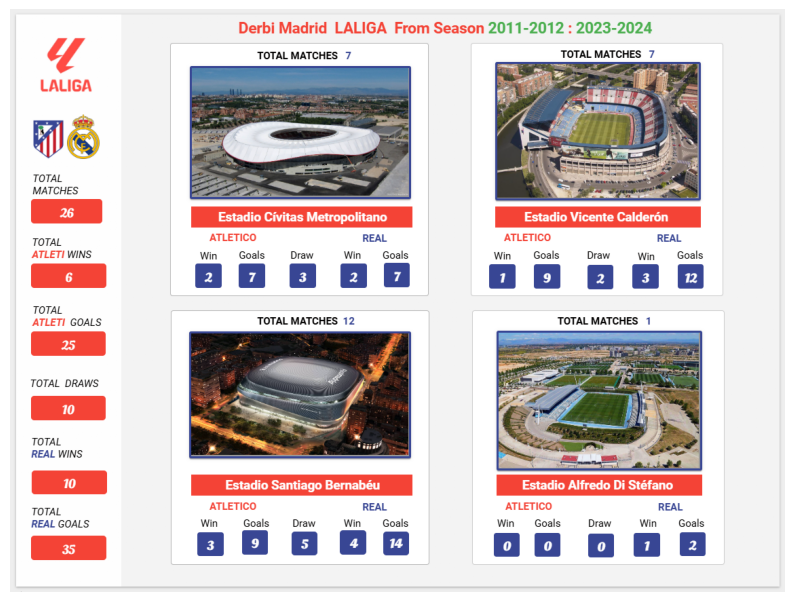

In [85]:
show_image('images/derbia_analysis_page_1.png')

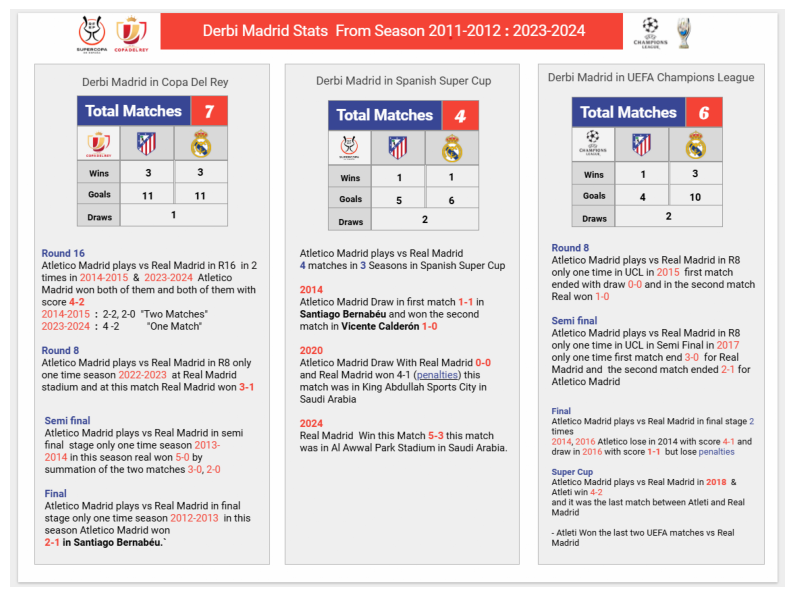

In [86]:
show_image('images/derbi_analysis_page_2.png')

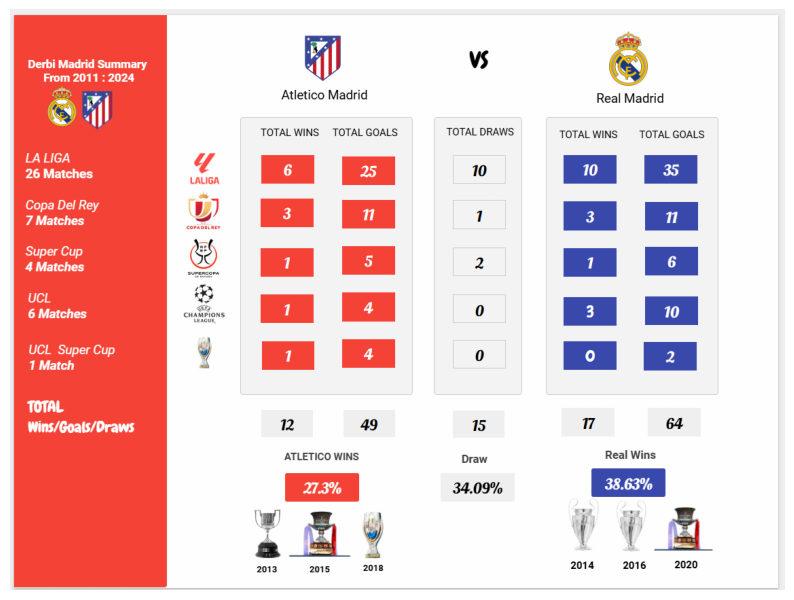

In [87]:
show_image('images/derbi_analysis_page_3.png')